# Baseline mit einem Spieler


In [16]:
import locale

from helpers import colorboxplot, makeHistogram,colors
from src.codeGameSimulation.store2db import getDataFromDB, getSettingsFromDB



# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")
# mpl.rcParams['figure.figsize'] = [20, 10]




Pfad aus dem die Datenbanken geladen werden sollen.

In [17]:
db_dir = "D:/Uni/BA/data/"
db_filename = "gameHistories_baseline_two_players"

Lade Daten aus der Datenbank

In [18]:
ids,roundCounts, stepCounts, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
settings = getSettingsFromDB(db_dir,db_filename)

db load finished after 0:00:08.221650
sort finished after 0:00:00.132030
groupby finished after 0:00:00.140032
sort finished after 0:00:00.527119
split finished after 0:00:03.969242
settings loaded


Erstelle Label basierend auf den Einstellungen des jeweiligen Testsets

In [19]:
labels_unordered  = [ " vs ".join([p.getStrategy().getName()+" [{}]".format(p.getStoneCount()) for p in s[1]]) for s in settings]
labels = [labels_unordered[i] for i in settingsIDs]
labels


['random [7] vs random [7]']

## Ein Spielstein

Text(0.5, 1.0, 'Spiellänge in Schritten für einen Stein [1.500.000 Spiele]')

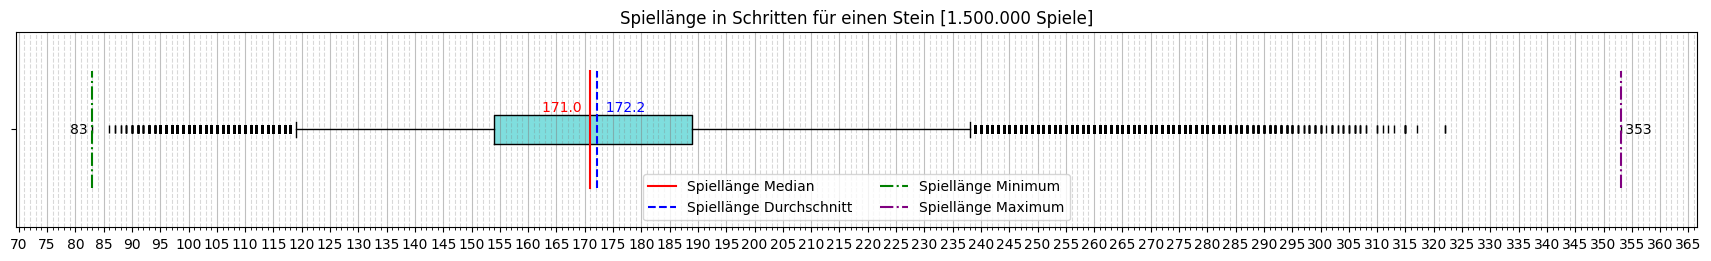

In [20]:
sc = stepCounts[0]
figSteps, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    17, 2.5], layout="constrained")
# colorboxplot([[rc/(i+1) for rc in part]
#              for i, part in enumerate(stepCounts)], ax["Boxplots"], labels, colors)
colorboxplot([sc], ax["Boxplots"], [""], colors[0])
ax["Boxplots"].set_title(
    "Spiellänge in Zügen für zwei Spieler mit allen Steinen [{0:n} Spiele]".format(len(sc), grouping=True))


Text(0.5, 1.0, 'Spiellänge in Runden für einen Stein [1.500.000 Spiele]')

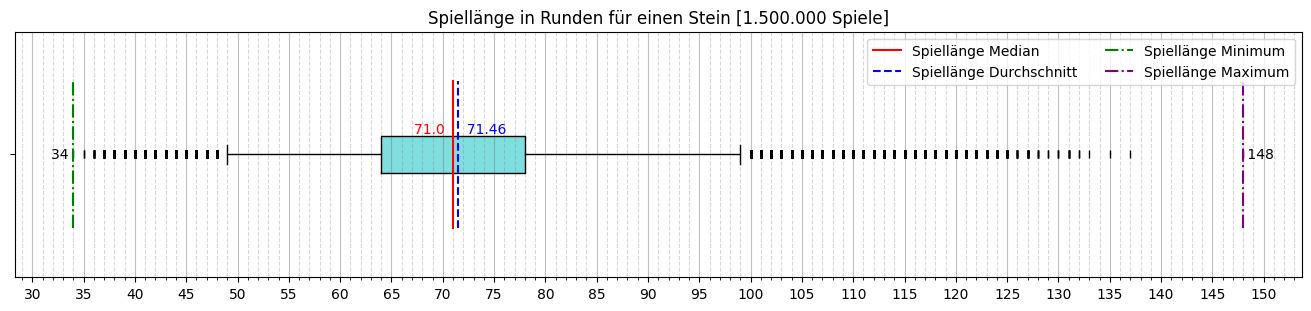

In [21]:
rc = roundCounts[0]
figRounds, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    13, 3], layout="constrained")
colorboxplot([rc], ax["Boxplots Runden"], [""], colors[0])
ax["Boxplots Runden"].set_title( "Spiellänge in Runden für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))


# figRounds1p1s, ax = plt.subplot_mosaic([["Boxplots"], ["Histogramm"]], figsize=[10, 5], layout="constrained", sharex=True)
# zeichneErrechnetenWert(ax["Boxplots"], "r")
# zeichneErrechnetenWert(ax["Histogramm"], "r", noText=True)
# colorboxplot([rc], ax["Boxplots"], [""], [colors[0]])
# ax["Boxplots"].set_title("Spiellänge in Runden für einen Stein [{0:n} Spiele]".format(len(rc), grouping=True))
# ax["Histogramm"].set_xlabel('empirisch bestimmte Spiellänge in Runden')
# ax["Boxplots"].tick_params('x', labelbottom=False)
# makeHistogram([rc], ax["Histogramm"], [""], [colors[0]], hideLegend=True)


In [22]:
figSteps.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Schritte.png", dpi=300,)
figRounds.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Runden.png", dpi=300,)
